In [1]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/Users/bobyan/Desktop/Kaggle Datasets/airline_satisfaction.csv')

# Drop unnecessary columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True, errors="ignore")

# Encode satisfaction as binary
df['satisfaction'] = df['satisfaction'].replace({
    "satisfied": 1,
    "neutral or dissatisfied": 0
})

# Drop missing values
df.dropna(inplace=True)

df.head()


/var/folders/tr/jd9dx4kd07d0dl3v_j__78bh0000gn/T/ipykernel_68605/224919650.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['satisfaction'] = df['satisfaction'].replace({


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [2]:
# Dropdown to select a categorical feature for bar plot
cat_dropdown = widgets.Dropdown(
    options=df.select_dtypes(include="object").columns.tolist(),
    description="Category:",
    value="Customer Type"
)


# Function to plot counts vs satisfaction
def plot_cat_feature(feature):
    fig = px.histogram(df, x=feature, color="satisfaction", barmode="group",
                       title=f"Satisfaction by {feature}")
    fig.show()


widgets.interact(plot_cat_feature, feature=cat_dropdown)


interactive(children=(Dropdown(description='Category:', index=1, options=('Gender', 'Customer Type', 'Type of …

<function __main__.plot_cat_feature(feature)>

In [3]:
# Slider for numeric feature vs satisfaction
num_slider = widgets.Dropdown(
    options=df.select_dtypes(include=np.number).columns.tolist(),
    description="Numeric:",
    value="Age"
)


def plot_num_feature(feature):
    fig = px.histogram(df, x=feature, color="satisfaction", nbins=30,
                       title=f"Satisfaction distribution by {feature}")
    fig.show()


widgets.interact(plot_num_feature, feature=num_slider)


interactive(children=(Dropdown(description='Numeric:', options=('Age', 'Flight Distance', 'Inflight wifi servi…

<function __main__.plot_num_feature(feature)>

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2890
           1       0.97      0.94      0.95      2289

    accuracy                           0.96      5179
   macro avg       0.96      0.96      0.96      5179
weighted avg       0.96      0.96      0.96      5179



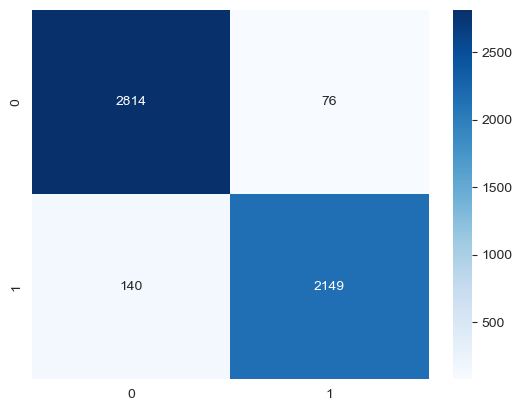

In [4]:
# Define features
numerical_features = df.select_dtypes(include=['number']).drop("satisfaction", axis=1).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

X = df[numerical_features + categorical_features]
y = df["satisfaction"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Use Classifier instead of Regressor (since satisfaction is categorical)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.show()


In [5]:
# Widgets for new passenger input
age = widgets.IntSlider(min=10, max=80, step=1, value=35, description="Age")
flight_distance = widgets.IntSlider(min=100, max=5000, step=50, value=1200, description="Flight Dist")
delay_dep = widgets.IntSlider(min=0, max=600, step=5, value=15, description="Dep Delay")
delay_arr = widgets.IntSlider(min=0, max=600, step=5, value=10, description="Arr Delay")

customer_type = widgets.Dropdown(options=df["Customer Type"].unique(), description="Customer Type")
travel_type = widgets.Dropdown(options=df["Type of Travel"].unique(), description="Travel Type")
seat_class = widgets.Dropdown(options=df["Class"].unique(), description="Class")

wifi = widgets.IntSlider(min=0, max=5, value=4, description="Wifi")
seat = widgets.IntSlider(min=0, max=5, value=5, description="Seat Comfort")
food = widgets.IntSlider(min=0, max=5, value=3, description="Food")
ent = widgets.IntSlider(min=0, max=5, value=4, description="Entertainment")


# Function to predict
def predict_passenger(Age, Flight_Dist, Dep_Delay, Arr_Delay, Customer_Type, Travel_Type, Class,
                      Wifi, Seat_Comfort, Food, Entertainment):
    new_passenger = pd.DataFrame({
        "Age": [Age],
        "Flight Distance": [Flight_Dist],
        "Departure Delay in Minutes": [Dep_Delay],
        "Arrival Delay in Minutes": [Arr_Delay],
        "Inflight wifi service": [Wifi],
        "Seat comfort": [Seat_Comfort],
        "Food and drink": [Food],
        "Inflight entertainment": [Entertainment],
        "Customer Type": [Customer_Type],
        "Type of Travel": [Travel_Type],
        "Class": [Class]
    })
    prediction = model.predict(new_passenger)[0]
    result = "😊 Satisfied" if prediction == 1 else "☹️ Dissatisfied"
    print(f"Prediction: {result}")


# Interactive UI
widgets.interact(
    predict_passenger,
    Age=age, Flight_Dist=flight_distance, Dep_Delay=delay_dep, Arr_Delay=delay_arr,
    Customer_Type=customer_type, Travel_Type=travel_type, Class=seat_class,
    Wifi=wifi, Seat_Comfort=seat, Food=food, Entertainment=ent
)


interactive(children=(IntSlider(value=35, description='Age', max=80, min=10), IntSlider(value=1200, descriptio…

<function __main__.predict_passenger(Age, Flight_Dist, Dep_Delay, Arr_Delay, Customer_Type, Travel_Type, Class, Wifi, Seat_Comfort, Food, Entertainment)>